In [237]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor as GF
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from scipy.stats import pearsonr
%matplotlib inline

train_path = 'C://Users//lenovo//Desktop//Docs//ZS//dataset'
os.chdir(train_path)

train = pd.read_csv('yds_train2018.csv')
test = pd.read_csv('yds_test2018.csv')
promotional_expense = pd.read_csv('promotional_expense.csv')
holidays = pd.read_excel('holidays.xlsx', sheet_name = None)
sample = pd.read_csv('sample_submission.csv')

In [118]:
productId2Type = {1 : 1,
                  2 : 2,
                  3 : 1,
                  4 : 4,
                  5 : 5}

In [119]:
train_by_month = train.groupby(['Year', 'Month', 'Product_ID', 'Country'], as_index = False)['Sales'].sum()
mean_by_month = train.groupby(['Month'])['Sales'].mean()
mean_by_product_id = train.groupby(['Product_ID'])['Sales'].mean()
mean_by_country = train.groupby(['Country'])['Sales'].mean()

In [120]:
all_data = pd.concat([train_by_month, test.drop(['S_No'], axis = 1)], axis = 0)

In [121]:
all_data['Product_Type'] = all_data['Product_ID']
all_data['Product_Type'].replace(productId2Type, inplace = True)
#all_data['Product_Enc'] = all_data['Product_ID'].map(mean_by_product_id)
#all_data['Month_Enc'] = all_data['Month'].map(mean_by_month)
#all_data['Country_Enc'] = all_data['Country'].map(mean_by_country)


In [122]:
def dateConverter(date):
    l = list(map(int, date.split(',')))
    return l[0], l[1], l[2]
promotional = promotional_expense.groupby(['Month', 'Year', 'Country'], as_index = False)['Expense_Price'].sum()

holidays[['yr', 'mn', 'dt']] = holidays['Date'].apply(dateConverter).apply(pd.Series)
data_expense = pd.merge(all_data, promotional, how = 'left', on = ['Month', 'Year', 'Country'])
holidays['Date'], holidays['Month'], holidays['Year'] = holidays['dt'], holidays['mn'], holidays['yr']
holidays_count = holidays.groupby(['Year', 'Month', 'Country'], as_index = False)['Holiday'].count()

data_expense_hol = pd.merge(data_expense, holidays_count, how = 'left', on = ['Month', 'Year', 'Country'])

data_expense_hol['Holiday'].fillna(0, inplace = True)

#data_expense_hol['Country'] = pd.get_dummies(data_expense_hol['Country'])
#data_expense_hol['Month'] = pd.get_dummies(data_expense_hol['Month'])
#data_expense_hol['Product_ID'] = pd.get_dummies(data_expense_hol['Product_ID'])

train_data = data_expense_hol[:388]
test_data = data_expense_hol[388:]

In [35]:
X = train_data.drop(['Sales', 'Year', 'Month', 'Country', 'Product_ID'], axis = 1)
y = train_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)
clf1 = LinearRegression()
clf1.fit(X_train, y_train)
print(mean_absolute_error(clf1.predict(X_test), y_test))
'''
clf1.fit(train_data.drop(['Sales'], axis = 1), train_data['Sales'])
clf1.score(train_data.drop(['Sales'], axis = 1), train_data['Sales'])
pred = clf1.predict(test_data.drop(['Sales'], axis = 1))
test['Sales'] = pred
test.drop(['Product_Type'], axis = 1).to_csv('linear2.csv')
'''

9359221.98354


"\nclf1.fit(train_data.drop(['Sales'], axis = 1), train_data['Sales'])\nclf1.score(train_data.drop(['Sales'], axis = 1), train_data['Sales'])\npred = clf1.predict(test_data.drop(['Sales'], axis = 1))\ntest['Sales'] = pred\ntest.drop(['Product_Type'], axis = 1).to_csv('linear2.csv')\n"

In [36]:
X = train_data.drop(['Sales'], axis = 1)
y = train_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
clf2 = RF()
clf2.fit(X_train, y_train)
print(SMAPE(clf2.predict(X_test), y_test))

16.6397590655


In [37]:
def SMAPE(x, y):
    return np.average(abs(x - y)/((abs(x) + abs(y))/2)) * 100

In [41]:
X = train_data.drop(['Sales', 'Year', 'Month', 'Country', 'Product_ID'], axis = 1)
y = train_data['Sales']
lis = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 402)
for i in range(1, 100):
    clf3 = RF(criterion = 'mae', n_estimators = i, max_depth = 7)
    clf3.fit(X_train, y_train)
    lis.append(SMAPE(clf3.predict(X_test), y_test))

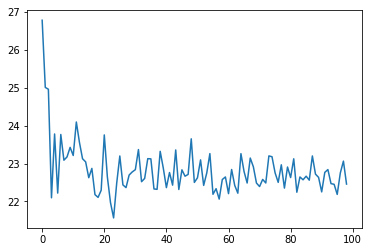

In [42]:
plt.plot(lis)

In [69]:
X = train_data.drop(['Sales', 'Year', 'Month', 'Country', 'Product_ID'], axis = 1)
y = train_data['Sales']
lis = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 4132)
for i in range(1, 100):
    clf3 = GF(criterion = 'mae')
    clf3.fit(X_train, y_train)
    lis.append(SMAPE(clf3.predict(X_test), y_test))

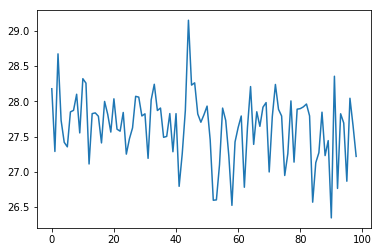

In [70]:
plt.plot(lis)

In [52]:
lis = []
clf5 = SVR()
clf5.fit(X_train, y_train)
lis.append(SMAPE(clf5.predict(X_test), y_test))

In [62]:
lis = []
for i in range(1, 15):
    clf5 = KNN(n_neighbors = i)
    clf5.fit(X_train, y_train)
    lis.append(SMAPE(clf5.predict(X_test), y_test))

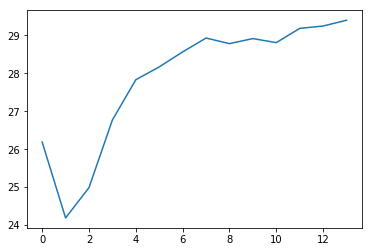

In [63]:
plt.plot(lis)

In [113]:
test['Sales'] = pred

In [115]:
test.to_csv('RFTuned.csv')

In [73]:
os.listdir()

['EUR_USD Historical Data.csv',
 'GBP_USD Historical Data.csv',
 'holidays.xlsx',
 'linear.csv',
 'linear2.csv',
 'mean.csv',
 'promotional_expense.csv',
 'random.csv',
 'random2.csv',
 'RFTuned.csv',
 'sample_submission.csv',
 'USD_ARS Historical Data(1).csv',
 'USD_COP Historical Data.csv',
 'USD_DKK Historical Data.csv',
 'yds_test2018.csv',
 'yds_train2018.csv']

In [139]:
eur = pd.read_csv('EUR_USD Historical Data.csv')
gbp = pd.read_csv('GBP_USD Historical Data.csv')
ars = pd.read_csv('USD_ARS Historical Data(1).csv')
cop = pd.read_csv('USD_COP Historical Data.csv')
dkk = pd.read_csv('USD_DKK Historical Data.csv')

In [141]:
month_num = {'Jan' : 1,
             'Feb' : 2,
             'Mar' : 3,
             'Apr' : 4,
             'May' : 5,
             'Jun' : 6,
             'Jul' : 7,
             'Aug' : 8,
             'Sep' : 9,
             'Oct' : 10,
             'Nov' : 11,
             'Dec' : 12
            } 

In [142]:
def monYear(x):
    return month_num[x[:3]], int(x[-2:])

In [143]:
lis = [eur, gbp, ars, cop, dkk]
for k in lis:
    k[["Month","Year"]] = k["Date"].apply(monYear).apply(pd.Series)

In [144]:
gbp = gbp[['Year', 'Month', 'Price']]
eur = eur[['Year', 'Month', 'Price']]
ars = ars[['Year', 'Month', 'Price']]
cop = cop[['Year', 'Month', 'Price']]
dkk = dkk[['Year', 'Month', 'Price']]

In [145]:
cop

,Year,Month,Price
0,18,1,"2,830.20"
1,17,12,"2,984.50"
2,17,11,"3,015.30"
3,17,10,"3,041.42"
4,17,9,"2,936.91"
5,17,8,"2,951.36"
6,17,7,"2,985.00"
7,17,6,"3,047.07"
8,17,5,"2,916.25"
9,17,4,"2,941.68"


In [146]:
ars['Country'] = "Argentina"
cop['Country'] = "Columbia"
fin = eur.copy()
fin['Country'] = "Finland"
eur['Country'] = "Belgium"
dkk['Country'] = "Denmark"
gbp['Country'] = "England"



C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [160]:
def inverse(x):
    return 1/x
def inverseSt(x):
    return 1/float(x.replace(',', ''))
ars['Price'] = ars['Price'].apply(inverse)
cop['Price'] = cop['Price'].apply(inverseSt)
dkk['Price'] = dkk['Price'].apply(inverse)


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [165]:
ars['Price'] = ars['Price'].apply(inverse)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [166]:
ars

,Year,Month,Price,Country
0,18,1,0.050929,Argentina
1,17,12,0.053722,Argentina
2,17,11,0.057787,Argentina
3,17,10,0.056705,Argentina
4,17,9,0.057760,Argentina
5,17,8,0.057680,Argentina
6,17,7,0.056673,Argentina
7,17,6,0.060161,Argentina
8,17,5,0.062135,Argentina
9,17,4,0.064984,Argentina


In [183]:
exchange_rates = pd.concat([ars, cop, dkk, eur, fin, gbp], axis = 0)
exchange_rates['Year'] += 2000

In [185]:
data_currency = pd.merge(data_expense_hol, exchange_rates, how = 'left', on = ['Country', 'Month', 'Year']) 

In [199]:
data_currency['Country'] = pd.get_dummies(data_currency['Country'])
data_currency['Month'] = pd.get_dummies(data_currency['Month'])
data_currency['Product_ID'] = pd.get_dummies(data_currency['Product_ID'])

In [201]:
data_currency['Sales_USD'] = data_currency['Price'] * data_currency['Sales']
data_currency['Expense_P_USD'] = data_currency['Price'] * data_currency['Expense_Price'] 
train_data = data_currency[:396]
test_data = data_currency[396:]

In [254]:
lis = []
for i in range(1, 100):
    clf4 = RF(n_estimators = i, max_depth = 6, criterion = 'mae')
    X = train_data.drop(['Expense_Price', 'Sales_USD', 'Sales'], axis = 1)
    y = train_data['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
    clf4.fit(X_train, y_train)
    lis.append(SMAPE(clf4.predict(X_test), y_test))

In [269]:
clf4 = RF(n_estimators = 60, max_depth = 6, criterion = 'mae')
X = train_data.drop(['Expense_Price', 'Sales_USD', 'Sales', 'Year'], axis = 1)
y = train_data['Sales']
clf4.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [271]:
pred = clf4.predict(test_data.drop(['Expense_Price', 'Sales_USD', 'Sales', 'Year'], axis = 1))

In [272]:
test['Sales'] = pred

In [273]:
test.to_csv('RF_Currency.csv')

In [267]:
lis = []
for i in range(1, 100):
    clf5 = GF(n_estimators = i, max_depth = 3, criterion = 'mae')
    X = train_data.drop(['Expense_Price', 'Sales_USD', 'Sales'], axis = 1)
    y = train_data['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
    clf5.fit(X_train, y_train)
    lis.append(SMAPE(clf5.predict(X_test), y_test))

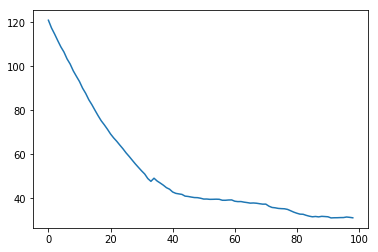

In [268]:
plt.plot(lis)

In [278]:
train_by_month = train_data.groupby(['Year', 'Month', 'Product_ID', 'Country'], as_index = False)['Sales'].sum()
mean_by_month = train_data.groupby(['Month'])['Sales'].mean()
mean_by_product_id = train_data.groupby(['Product_ID'])['Sales'].mean()
mean_by_country = train_data.groupby(['Country'])['Sales'].mean()
data_currency['Product_Enc'] = data_currency['Product_ID'].map(mean_by_product_id)
data_currency['Month_Enc'] = data_currency['Month'].map(mean_by_month)
data_currency['Country_Enc'] = data_currency['Country'].map(mean_by_country)

In [328]:
data_currency['Product_Type'] = pd.get_dummies(data_currency['Product_Type'])
test_data = data_currency[396:]
train_data = data_currency[:396]

In [329]:
lis = []
for i in range(1, 100):
    clf4 = RF(n_estimators = i, max_depth = 6, criterion = 'mae')
    X = train_data.drop(['Sales_USD', 'Sales'], axis = 1)
    y = train_data['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
    clf4.fit(X_train, y_train)
    lis.append(SMAPE(clf4.predict(X_test), y_test))

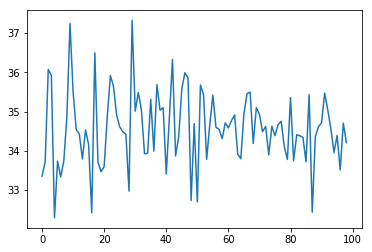

In [330]:
plt.plot(lis)

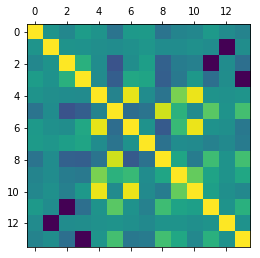

In [296]:
plt.matshow(train_data.corr())

In [324]:
lis = []
for i in range(1, 100):
    clf4 = RF(n_estimators = i, max_depth = 6, criterion = 'mae')
    
    X = train_data[['Expense_P_USD', 'Expense_Price', 'Price', 'Product_Enc', 'Country_Enc', 'Month_Enc']]
    y = train_data['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
    clf4.fit(X_train, y_train)
    lis.append(SMAPE(clf4.predict(X_test), y_test))

In [326]:
train_data

,Year,Month,Product_ID,Country,Sales,Product_Type,Expense_Price,Holiday,Price,Sales_USD,Expense_P_USD,Product_Enc,Month_Enc,Country_Enc
0,2013,1,1,1,3.434602e+07,1,16078.681,1.0,0.200880,6.899424e+06,3229.883088,1.921591e+07,2.017131e+07,1.871719e+07
1,2013,1,1,1,3.434602e+07,1,16078.681,1.0,0.200884,6.899563e+06,3229.947971,1.921591e+07,2.017131e+07,1.871719e+07
2,2013,1,1,0,3.947356e+06,1,3329.848,2.0,0.000563,2.221985e+03,1.874387,1.921591e+07,2.017131e+07,2.207340e+07
3,2013,1,1,0,3.947356e+06,1,3329.848,2.0,0.000563,2.223349e+03,1.875537,1.921591e+07,2.017131e+07,2.207340e+07
4,2013,1,0,1,2.751851e+06,2,16078.681,1.0,0.200880,5.527915e+05,3229.883088,2.168664e+07,2.017131e+07,1.871719e+07
5,2013,1,0,1,2.751851e+06,2,16078.681,1.0,0.200884,5.528026e+05,3229.947971,2.168664e+07,2.017131e+07,1.871719e+07
6,2013,1,0,0,3.148501e+05,2,249.590,1.0,1.357900,4.275350e+05,338.918261,2.168664e+07,2.017131e+07,2.207340e+07
7,2013,1,0,0,2.885137e+06,2,3329.848,2.0,0.000563,1.624057e+03,1.874387,2.168664e+07,2.017131e+07,2.207340e+07
8,2013,1,0,0,2.885137e+06,2,3329.848,2.0,0.000563,1.625054e+03,1.875537,2.168664e+07,2.017131e+07,2.207340e+07
9,2013,1,0,0,1.018476e+08,2,43843.906,1.0,0.182003,1.853662e+07,7979.744103,2.168664e+07,2.017131e+07,2.207340e+07


In [331]:
lis = []
for i in range(1, 100):
    clf5 = GF(n_estimators = i, max_depth = 3, criterion = 'mae')
    X = train_data.drop(['Expense_Price', 'Sales_USD', 'Sales'], axis = 1)
    y = train_data['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
    clf5.fit(X_train, y_train)
    lis.append(SMAPE(clf5.predict(X_test), y_test))

In [335]:
clf6 = SVR()
X = train_data[['Expense_Price', 'Expense_P_USD']]
y = train_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
clf5.fit(X_train, y_train)
print(SMAPE(clf5.predict(X_test), y_test))

57.3542257249


In [307]:
clf4 = RF(n_estimators = 150, max_depth = 6, criterion = 'mae')
clf4.fit(X, y)
pred = clf4.predict(test_data[['Expense_P_USD', 'Expense_Price']])
test['Sales'] = pred

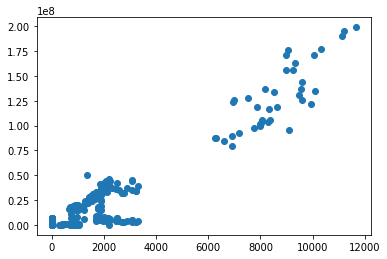

In [337]:
plt.scatter(train_data['Expense_P_USD'] ,train_data['Sales'])

In [312]:
train_data['Sales'].std()

38723054.9224357

In [313]:
test.to_csv('TwoFeatures.csv')